# Numerical Methods-An Introduction
The following chapter should give a brief introduction into numerical methods and is especially focusing on providing an engineering perspective for these concepts. Some important concepts will be derived, but only to an extent, that the urge for consistency in a method for the engineer is satisfied and that more important underlying concepts like Error estimation and error accumulation can be understood. This starting point should give enough insight to help you continue your adventure into the world of numerical methods on your own.

## Governing differential equations and their "meaning"
Let's take a look at the heat equation {eq}`heat_cond_eq`.

$$
\frac{dT}{dt} = \nabla (\lambda \nabla T)
$$(heat_cond_eq)

A mathematician would refer to this as a homogenous parabolic partial differential equation. While this information can give helpful insight when we are stuck on/ or want to improve our numerical algorithm to solve a problem, we will focus more on the physical meaning of these governing differential equations. A simple but yet on the point explanations of the "meaning" of differential equations could be the following:

> "Differential equations are concepts which describe the physical behaviour we can expect of something."

Considering equation {eq}`heat_cond_eq` again with this perspective we could give the following interpretation:

*"In general heat will flow from a point of higher temperature to a point of lower temperature. The rate of the flux is dependent on the potential which is given by the difference in temperature. The higher the difference in the temperature in two points the higher the flux. This concept is governed by the first Nabla-Operator in {eq}`heat_cond_eq` $(\lambda \nabla T)$ inside the brackets. Furthermore, the change of temperature over time will be dependent on the sum of changes of this flux. This concepts is governed by the second Nabla-Operator in {eq}`heat_cond_eq` $\nabla (...)$ outside the brackets."*

## A word about the nature of numerical methods

{cite}`patankarNumericalHeatTransfer1980` gives a helpful note about the numerical investigation of these differential equations which will be the leading credo for all our numerical investigations in this course:

> "A numerical solution of a differential equation consists of a set of numbers from which the distribution of the dependant variable $\Phi$ can be constructed. In this sense, a numerical method is akin to a laboratory experiment, in which a set of instrument readings enables us to establish the distribution of the measured quantity in the domain under investigation. The numerical analyst and the laboratory experiment both must remain content with only a finite number of numerical values as the outcome, although this number can, at least in principle, be made large enough for practical purposes." {cite}`patankarNumericalHeatTransfer1980`

## Discretization
To make any numerical calculations the first step that has to be taken is the discretization of the problem domain, but why? The concepts the equations we are dealing with describe are of general and therefore continuous nature.  Discretization allows us to replace the continuous information with discrete values and make these problems computable with algebraic methods.

## The Finite Difference Method
One of these discretization methods is the Finite Differences Method. It is based on the Taylor-series expansion of a function around a certain point. It can be sufficiently explained by fairly simple mathematical methods and is very intuitive in its nature. A condensed explanation of the most important concepts will be given here, for a more detailed explanation turn to your lecture notes and textbooks like {cite}`NumericalMethodsOrdinary2016`.

Let's consider $T$, which in our example should be an arbitrary function. If we have a discrete calculation domain like given in {numref}`FDM_points` and want to approximate the first- or second-derivative of $T$ in this domain we can do this by performing a Taylor-series expansion. Since we want to derive the function for grid point 2 we will develop our Taylor-series around this point once for the grid point 1 and once for the grid point 3.

$$
T_{1} = T_{2} - \frac{dT_{2}}{dx} \Delta x + \frac{1}{2} \frac{d^{2}T_{2}}{dx^{2}} \Delta x^{2} - ...
$$(FDM_Taylor_series_1)

and

$$
T_{3} = T_{2} + \frac{dT_{2}}{dx} \Delta x + \frac{1}{2} \frac{d^{2}T_{2}}{dx^{2}} \Delta x^{2} + ...
$$(FDM_Taylor_series_3)

"Truncating the series after the third term, and adding and subtracting the series from each other we obtain

$$
\frac{dT_{2}}{dx} = \frac{T_{3} - T_{1}}{2 \Delta x} + O(\Delta x^{2})
$$(FDM_1st_deriv)

and

$$
\frac{d^{2}T_{2}}{dx^{2}} = \frac{T_{3} + T_{1} - 2T_{2}}{\Delta x^{2}} + O(\Delta x^{2})
$$(FDM_2nd_deriv)

"{cite}`patankarNumericalHeatTransfer1980`

Since we truncated the Taylor-series we are left with a truncation error based on the remainder term. After some investigation one can find out that this error gives us the order of accuracy of the method. Both give us $O(h^{2})$ as the order of accuracy. Which means that our Error is equal to the square of the chosen step size.

```{note}
The order of accuracy gives us an estimation of how fast the chosen approximation converges to the exact solution
when $h \rightarrow 0$. Therefore, usually higher orders of accuracy are better.
```

```{figure} img/Intro_Numerics/FDM_points.png
---
height: 200px
name: FDM_points
---
Three successive grid points used for Taylor-series expansion. {cite}`patankarNumericalHeatTransfer1980`
```

#### Example  $1^{st} $ Derivative

The following code computes the numerical derivative of $f(x)=cos(x)$ using the forward difference formula for decreasing step sizes, $h$. It then plots the maximum error between the approximated derivative and the true derivative versus ℎ as shown in the generated figure. We are also plotting Orders of accuracy and we can see that the approximation is of first order of accuracy.
We are also using the central differences for the approximation in a different step and as expected we see that its order of accuracy increased.
Reference code from [here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

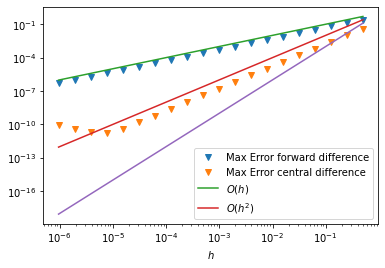

In [2]:
# define step size
h = 1
# define number of iterations to perform
iterations = 20
# list to store our step sizes
step_size = []
# list to store max error for each step size
max_error_forward = []
max_error_central = []

for i in range(iterations):
    # halve the step size
    h /= 2
    # store this step size
    step_size.append(h)
    # compute new grid
    x = np.arange(0, 2 * np.pi, h)
    # compute function value at grid
    y = np.cos(x)
    # compute vector of forward differences
    forward_diff = np.diff(y) / h
    # compute corresponding grid
    x_diff = x[:-1]
    # compute exact solution
    exact_solution = -np.sin(x_diff)

    # Compute max error between
    # numerical derivative and exact solution
    max_error_forward.append(max(abs(exact_solution - forward_diff)))

    # Central DIfferences
    # Repeat the analysis for central differences
    # compute vector of central differences
    y_plus = y[2:]
    y_minus = y[0:-2]
    central_diff = (y_plus - y_minus) / (2 * h)
    # compute exact solution
    exact_solution_central = -np.sin(x[1:-1])
    # Compute max error between
    # numerical derivative and exact solution
    max_error_central.append(max(abs(exact_solution_central - central_diff)))

# Error Orders
hs = np.array(step_size)
O_first = hs
O_second = hs ** 2
O_third = hs ** 3

# produce log-log plot of max error versus step size
# plt.figure(figsize = (12, 8))
plt.loglog(hs, max_error_forward, 'v', label='Max Error forward difference')
plt.loglog(hs, max_error_central, 'v', label='Max Error central difference')
plt.loglog(hs, O_first, label='$O(h)$')
plt.loglog(hs, O_second, label='$O(h^{2})$')
plt.loglog(hs, O_third)

# plt.ylabel('$$')
plt.xlabel('$h$')
plt.legend()
plt.show()

## Numerical Integration
The right-hand-side of equation {eq}`heat_cond_eq` can be dealt with, with the discretization methods we discussed before. Now let's focus on the lef-hand-side. As usual, for most of the governing equations which describe the conservation of some kind of quantity, the physical concepts are defined for the changes these quantities may undergo. Like in  equation {eq}`heat_cond_eq` the right-hand-side describes how the Temperature will change over time. We are mostly interested in the evaluation of the quantity at a certain point in time. Since we are only given the definition of the derivative of the quantity we have to integrate the equation to obtain the quantity itself. Some methods, like the Finite Volume Method, base their approach in the conservation and therefore integration of the quantities. For now, we will stick with a method that can be described by the before used Taylor-series expansion, and look at the Finite Volume Method in a later chapter. We will investigate the Euler-Method in its explicit and implicit form, since this method can give us valuable insight into numerical integration methods and the governing concepts.

### Explicit Methods - Euler Method
The Explicit (or Forward) Euler Method is a numerical method for solving initial value problems. The method can be derived by different approaches, but since we already used the Taylor-series expansion, we will us it again.

This time consider only the left-hand-side of {eq}`heat_cond_eq`. For simplicity, we will write this as

$$
\frac{dT}{dt} = f
$$(heat_cond_left_eq)

with f being a known function.

Assuming, we are interested in the Temperature at grid point 2 from {numref}`FDM_points` at $t = t_{i} + \Delta t$. We again develop our Taylor-series around this point, but now as a function of time. We want to obtain an approximation of the function at an arbitrary later point in time $t_{i} + \Delta t$ developing our series around the last known point in time.  We assume that our time step stays the same with every iteration resulting in $t_{i} - t_{i+1} = \Delta t $

$$
T_{2}(t_{i} + \Delta t) = T_{2}(t_{i}) + \frac{dT(t_{i})}{dt} \Delta t + O(h^{2})
$$(Taylor_exp_euler_eq)

This method has a **Local Truncation Error** of $O(h^{2})$ but the errors accumulate with each time step till the desired solution time is reached. After some investigation one can see that the accumulated or **Global Truncation Error** is of $O(h)$.

#### Example: Explicit Euler Method
The differential equation $\frac{df(t)}{dt} = e^{-t}$ with initial condition $f_{0} = -1 $ has the exact solution $f(t) = -e^{-t}$. Approximate the solution to this initial value problem between 0 and 1 in increments of 0.1 using the Explicit Euler Formula. Plot the difference between the approximated solution and the exact solution.

Example code is taken from  [here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.03-The-Euler-Method.html).

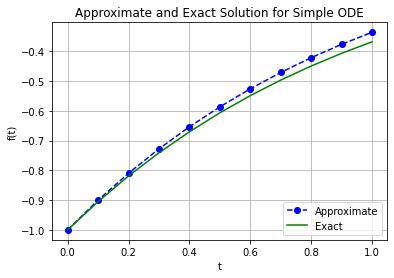

In [3]:
# Define parameters
f = lambda t: np.exp(-t)  # ODE
h = 0.1  # Step size
t = np.arange(0, 1 + h, h)  # Numerical grid
s0 = -1  # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h * f(t[i])

plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()


Let's check again the order of accuracy:

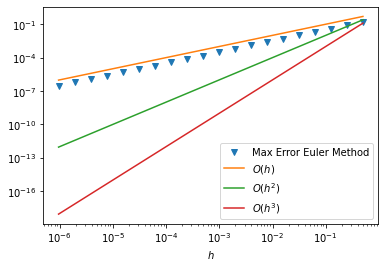

In [4]:
iterations = 20

# Define parameters
# f = lambda t, s: np.exp(-t) # ODE
f = lambda t: np.exp(-t)  # ODE
h = 1  # Step size

s0 = -1  # Initial Condition
# lists to store our step sizes and errors
step_size = []
max_error = []

# Explicit Euler Method


for i in range(iterations):
    h /= 2
    step_size.append(h)
    t = np.arange(0, 1 + h, h)  # Numerical grid
    exact_solution = -np.exp(-t)
    s = np.zeros(len(t))
    s[0] = s0
    for i in range(0, len(t) - 1):
        # s[i + 1] = s[i] + h*f(t[i], s[i])
        s[i + 1] = s[i] + h * f(t[i])
    max_error.append(np.max(np.abs(exact_solution - s)))

# Error Orders
hs = np.array(step_size)
O_first = hs
O_second = hs ** 2
O_third = hs ** 3

# Plot results
plt.loglog(hs, max_error, 'v', label='Max Error Euler Method')
plt.loglog(hs, O_first, label='$O(h)$')
plt.loglog(hs, O_second, label='$O(h^{2})$')
plt.loglog(hs, O_third, label='$O(h^{3})$')

# plt.ylabel('$$')
plt.xlabel('$h$')
plt.legend()
plt.show()

What happens if we consider more terms of the Taylor-Expansion?
We expect a rise in accuracy. $O(h) \rightarrow O(h^{2})$

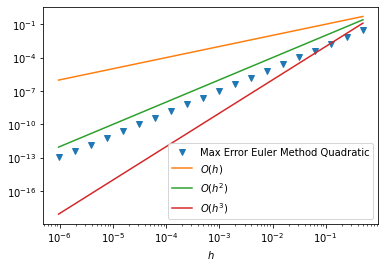

In [5]:
# Modified Euler Method

iterations = 20

# Define parameters
# Two terms of the Taylor expansion
f = lambda t: np.exp(-t)  # ODE
f2 = lambda t: -np.exp(-t)  # ODE
h = 1  # Step size

s0 = -1  # Initial Condition
# lists to store our step sizes and errors
step_size = []
max_error = []

# Explicit Euler Method

for i in range(iterations):
    h /= 2
    step_size.append(h)
    t = np.arange(0, 1 + h, h)  # Numerical grid
    exact_solution = -np.exp(-t)
    s = np.zeros(len(t))
    s[0] = s0
    for i in range(0, len(t) - 1):
        # s[i + 1] = s[i] + h*f(t[i], s[i]) + 1/2 * h**2 * f2(t[i], s[i])
        s[i + 1] = s[i] + h * f(t[i]) + 1 / 2 * h ** 2 * f2(t[i])
    max_error.append(np.max(np.abs(exact_solution - s)))

# Error Orders
hs = np.array(step_size)
O_first = hs
O_second = hs ** 2
O_third = hs ** 3

# Plot results
plt.loglog(hs, max_error, 'v', label='Max Error Euler Method Quadratic')
plt.loglog(hs, O_first, label='$O(h)$')
plt.loglog(hs, O_second, label='$O(h^{2})$')
plt.loglog(hs, O_third, label='$O(h^{3})$')

# plt.ylabel('$$')
plt.xlabel('$h$')
plt.legend()
plt.show()

```{note}
With this we can understand what different numerical integrators try to achieve. In the same way we modified the linear Euler Method other numerical integrators try to rise the order of accuracy by eg. taking into account more terms of the Taylor-series, combining implicit and explicit schemes or approximating terms of the Taylor-series. The goal is to keep computational costs in affordable relations to the benefit of the scheme.
```

## Implicit Methods
The concept of implicit methods will also be explained with the counterpart of the Explicit Euler Method, the Implicit Euler Method. Implicit methods rely on results of the next time step to solve for the next time step. This can easily be explained, when obtaining the Euler Method with a backwards Taylor-series expansion as we will see shortly. Simplified this means that implicit methods use unknowns to solve for unknowns which is only possible with the use of iterative methods.
### Implicit Euler Method
This time we want to obtain an approximation of the function at a known point in time $t_{i}$ by developing our series around the next unknown point in time $t_{i} + \Delta t$.

$$
T_{2}(t_{i}) = T_{2}(t_{i} + \Delta t) - \frac{dT(t_{i} + \Delta t)}{dt} \Delta t + O(h^{2})
$$(Taylor_impl_euler_eq)

```{note}
This method is unconditionally stable, but may give wrong results for intermediate time steps when the time step is chosen too big. Therefore, this method is especially favourable when we are only interested in the end result of calculation, like for example when looking at stationary problems.
```


#### Example: Implicit Euler Method

The differential equation $\frac{df(t)}{dt} = e^{-t}$ with initial condition $f_{0} = -1 $ has the exact solution $f(t) = -e^{-t}$. Approximate the solution to this initial value problem between 0 and 1 in increments of 0.1 using the Implicit Euler Formula. Plot the difference between the approximated solution and the exact solution.

Example code is taken from  [here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.03-The-Euler-Method.html).

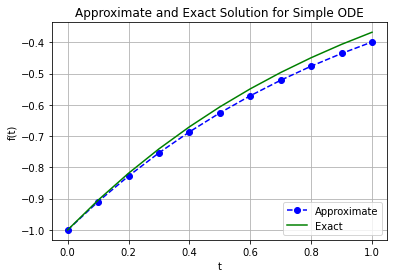

In [6]:
from scipy.optimize import fsolve


# function for Implicit Euler Method
def f_ImplicitEuler(s, sp, h, t, n):
    f = lambda t: np.exp(-t)  # ODE
    return s - sp - f(t[n + 1]) * h


f = lambda t: np.exp(-t)  # ODE
h = 0.1  # Step size
t = np.arange(0, 1 + h, h)  # Numerical grid
s0 = -1  # Initial Condition
s = np.zeros(len(t))
s[0] = s0

for n in range(0, len(t) - 1):
    s[n + 1] = fsolve(f_ImplicitEuler, s[n], args=(s[n], h, t, n))

plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

```{important}
Different numerical integrators are better suited for certain problems. You can improve your algorithms a lot by using integrators which are built for your specifc problems. E.g. integrators which can deal better with PDEs of higher order and so on. This is where the mathematical background of the equations becomes of interest. For prototyping it is usually enough to try a couple of the most used ones and compare them in relation to execution time and pick the best performer.
```